<a href="https://colab.research.google.com/github/gayathriramanesh/Automatic_lane_detector_and_traffic_sign_recognition/blob/main/traffic_sign_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import os
os.chdir('/content/drive/MyDrive/project')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
data =[]
labels = []
classes =43 
cur_path = os.getcwd()
print(cur_path)

/content/drive/MyDrive/project


In [3]:
for i in range(classes):     
    path = os.path.join(cur_path,'Train',str(i))     
    images = os.listdir(path)
    for a in images:
        try:             
            image = Image.open(path +'/'+ a)           
            image = image.resize((30,30)) 
            # Resizing all images into 30*30                                                 
            image =np.array(image)             
            data.append(image)             
            labels.append(i)
        except Exception as e:
            print(e)

In [4]:
data = np.array(data) 
labels = np.array(labels)
print(data.shape, labels.shape) 

(39230, 30, 30, 3) (39230,)


In [5]:
X_train, X_test, y_train, y_test =train_test_split(data, labels, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) 


(31384, 30, 30, 3) (7846, 30, 30, 3) (31384,) (7846,)


In [6]:
y_train = to_categorical(y_train,43) 
y_test = to_categorical(y_test,43)

In [18]:
model =Sequential() 
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:])) 
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu')) 
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu')) 
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25)) 
model.add(Flatten()) 
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 20 
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
981/981 [==============================] - 136s 138ms/step - loss: 2.1701 - accuracy: 0.4574 - val_loss: 0.6697 - val_accuracy: 0.8425
Epoch 2/20
981/981 [==============================] - 136s 139ms/step - loss: 0.9105 - accuracy: 0.7303 - val_loss: 0.3454 - val_accuracy: 0.9071
Epoch 3/20
981/981 [==============================] - 135s 137ms/step - loss: 0.6239 - accuracy: 0.8144 - val_loss: 0.2596 - val_accuracy: 0.9322
Epoch 4/20
981/981 [==============================] - 135s 138ms/step - loss: 0.4445 - accuracy: 0.8669 - val_loss: 0.1704 - val_accuracy: 0.9539
Epoch 5/20
981/981 [==============================] - 135s 138ms/step - loss: 0.3673 - accuracy: 0.8927 - val_loss: 0.1119 - val_accuracy: 0.9694
Epoch 6/20
981/981 [==============================] - 135s 138ms/step - loss: 0.3109 - accuracy: 0.9087 - val_loss: 0.1152 - val_accuracy: 0.9690
Epoch 7/20
981/981 [==============================] - 135s 138ms/step - loss: 0.2959 - accuracy: 0.9131 - val_loss: 0.1047 -

In [20]:
model.save("./training/TSR.h5")

In [21]:
import os
model = load_model("./training/TSR.h5")


In [22]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Vehicle > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing vehicle > 3.5 tons' }

In [31]:
 def test_on_img(img):
    data=[]   
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test = np.array(data)
    Y_pred=np.argmax(model.predict(X_test), axis=-1)
    return image,Y_pred

Predicted traffic sign is Speed limit (30km/h)


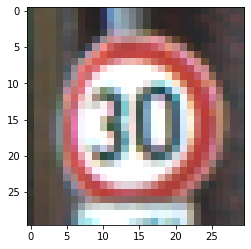

In [34]:
plot,prediction = test_on_img(r'/content/drive/MyDrive/project/Test/00001.png')
s = [str(i) for i in prediction]
a = int("".join(s))
print("Predicted traffic sign is",classes[a])
plt.imshow(plot)
plt.show()